In [1]:
library('igraph')
library('Matrix')
library('pracma')


Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union


Attaching package: 'pracma'

The following objects are masked from 'package:Matrix':

    expm, lu, tril, triu



In [2]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

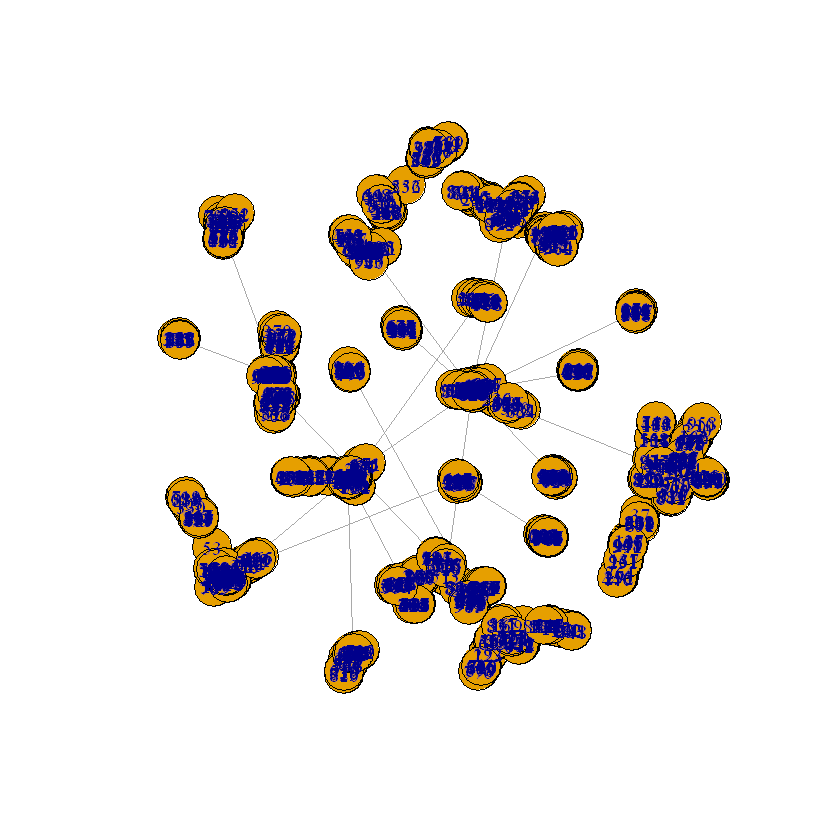

In [9]:
g<-barabasi.game(1000,m=1,directed=F)
plot(g)
#M=create_transition_matrix(g)
#sum<-0
#for(i in 1:100){
#    sum<-sum+M[1,i]
#}
#M
#sum

### Transition Matrix for an Undirected Network


8 x 8 sparse Matrix of class "dgCMatrix"
                                                                  
[1,] .    1.0000000 .         .         . .         .    .        
[2,] 0.25 .         0.2500000 0.2500000 . 0.2500000 .    .        
[3,] .    0.5000000 .         .         . .         .    0.5000000
[4,] .    0.2500000 .         .         . 0.2500000 0.25 0.2500000
[5,] .    .         .         .         1 .         .    .        
[6,] .    0.3333333 .         0.3333333 . .         .    0.3333333
[7,] .    .         .         1.0000000 . .         .    .        
[8,] .    .         0.3333333 0.3333333 . 0.3333333 .    .        


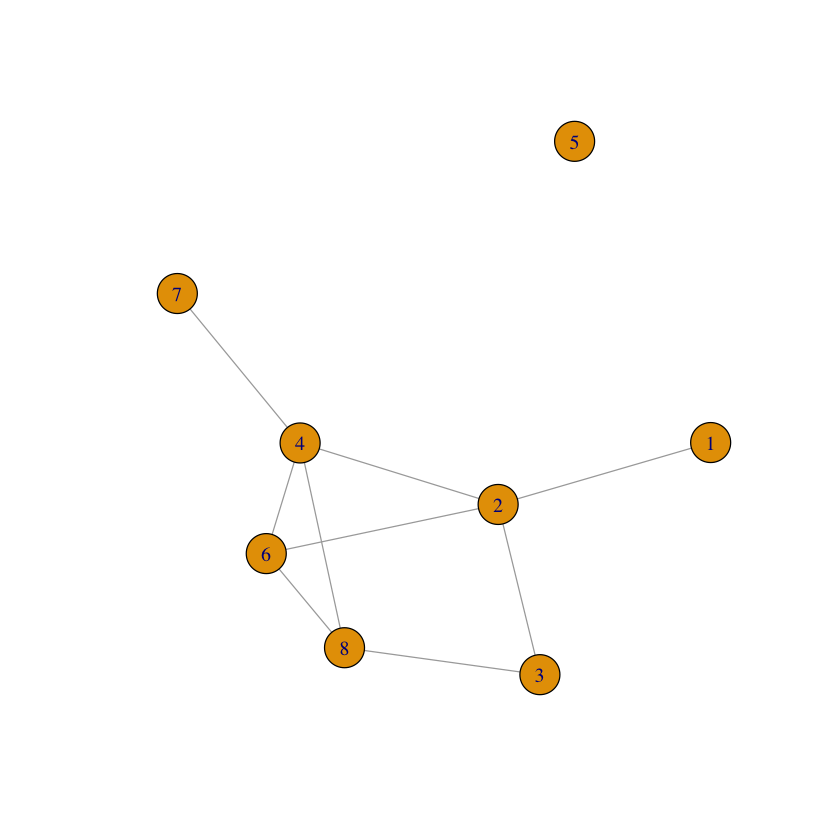

In [33]:
set.seed(0)
g = random.graph.game(8, 0.3)
plot(g)
print(create_transition_matrix(g))

### Transition Matrix for a Directed Network

8 x 8 sparse Matrix of class "dgCMatrix"
                                                                    
[1,] .    .         .    0.5000000 0.5000000 .         .         .  
[2,] 0.20 .         .    .         0.2000000 0.2000000 0.2000000 0.2
[3,] .    0.3333333 .    0.3333333 .         0.3333333 .         .  
[4,] 0.25 .         0.25 .         0.2500000 .         0.2500000 .  
[5,] .    0.5000000 .    .         .         .         .         0.5
[6,] .    0.3333333 .    .         0.3333333 .         0.3333333 .  
[7,] .    .         .    .         .         .         1.0000000 .  
[8,] .    0.2500000 0.25 .         0.2500000 .         0.2500000 .  


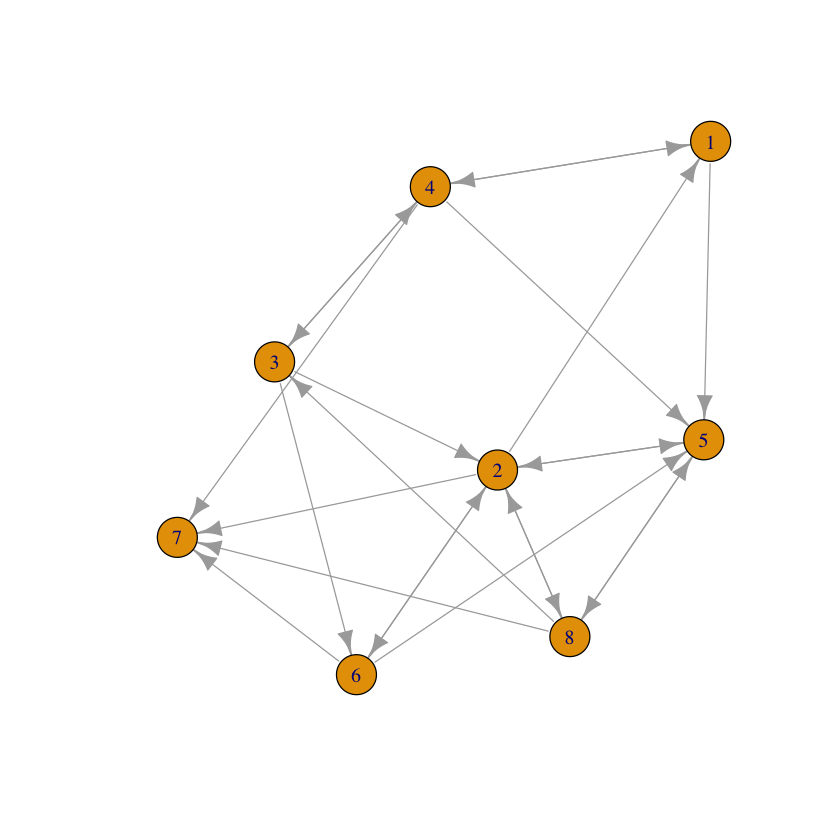

In [34]:
set.seed(1)
g = random.graph.game(8, 0.4, directed = T)
plot(g)
print(create_transition_matrix(g))

In [35]:
random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    for(i in 1:num_steps){
        fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)        
    }
    
    return(v)
}

In [ ]:
random_walk_4b = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        n=dim(transition_matrix)[0]
        i<-sample(1:1000,1)
        if(i<=850){
            transition_matrix<-transition_matrix
        }
        else{
            transition_matrix<-transition_matrix*0
            transition_matrix[,n/2]<-0.5
            transition_matrix[,n/2+1]<-0.5
        }
    v = start_node
    for(i in 1:num_steps){
        fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)        
    }
    
    return(v)
}

In [37]:
set.seed(1)
v_last = random_walk(g, 15, 1)

Step 1: 1
Step 2: 5
Step 3: 8
Step 4: 2
Step 5: 6
Step 6: 7
Step 7: 7
Step 8: 7
Step 9: 7
Step 10: 7
Step 11: 7
Step 12: 7
Step 13: 7
Step 14: 7
Step 15: 7
